In [329]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from scipy import stats
import numpy as np
import statsmodels.api as sm
import pylab
import statsmodels.stats.weightstats as ws

In [2]:
df = pd.read_csv('20k_playlists.csv')

In [54]:
stats.shapiro(df.diversity_ratio.sample(500))

ShapiroResult(statistic=0.972589910030365, pvalue=4.6479851079084256e-08)

In [ ]:
#p_value less than 0.05, cannot assume the data is normally distributed. 

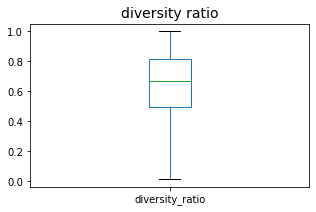

In [283]:
fig, ax = plt.subplots(figsize=(5,3))
df.diversity_ratio.plot(kind='box')
ax.set_title('diversity ratio', fontsize=14)
#ax.set_ylabel('count of occurrance', fontsize=14)
#plt.legend(fontsize=14)
fig.savefig('box_plot.png', dpi=300)
plt.show()

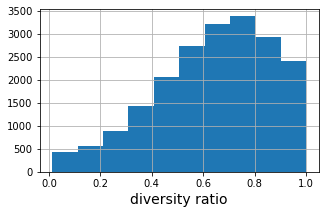

In [285]:
fig, ax = plt.subplots(figsize=(5,3))
df.diversity_ratio.hist()
ax.set_xlabel('diversity ratio', fontsize=14)
#ax.set_title('diversity ratio', fontsize=14)
#ax.set_ylabel('count of occurrance', fontsize=14)
#plt.legend(fontsize=14)
fig.savefig('histogram.png', dpi=300)

## Based on Shapiro Wilk test, box plot and historgram visualizations, we cannot assume that diversity_ratio nor num_followers is normally distributed. 

In [151]:
stats.shapiro(df.num_followers.sample(500))

ShapiroResult(statistic=0.42116695642471313, pvalue=4.2296537250340386e-37)

In [4]:
df.corr()

,pid,collaborative,duration_ms,num_albums,num_artists,num_edits,num_followers,num_tracks,diversity_ratio
pid,1.000000,0.001648,0.004593,0.003351,-0.002237,-0.000257,0.002566,0.004918,-0.008035
collaborative,0.001648,1.000000,0.020070,0.027601,0.036204,0.029246,-0.001766,0.017065,0.031225
duration_ms,0.004593,0.020070,1.000000,0.892883,0.805262,0.601488,-0.001288,0.985038,-0.388490
num_albums,0.003351,0.027601,0.892883,1.000000,0.954827,0.670223,-0.000484,0.901493,-0.110367
num_artists,-0.002237,0.036204,0.805262,0.954827,1.000000,0.661720,0.000307,0.818935,0.067262
num_edits,-0.000257,0.029246,0.601488,0.670223,0.661720,1.000000,0.000100,0.604215,-0.052360
num_followers,0.002566,-0.001766,-0.001288,-0.000484,0.000307,0.000100,1.000000,-0.000952,0.000648
num_tracks,0.004918,0.017065,0.985038,0.901493,0.818935,0.604215,-0.000952,1.000000,-0.389533
diversity_ratio,-0.008035,0.031225,-0.388490,-0.110367,0.067262,-0.052360,0.000648,-0.389533,1.000000


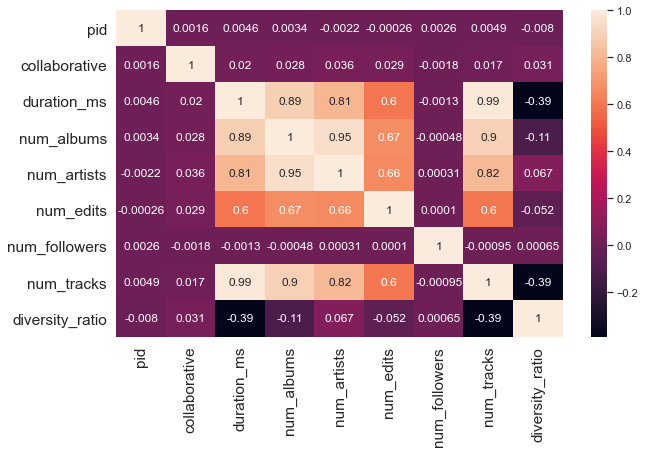

In [317]:
fig, ax = plt.subplots(figsize=(10,6))
sn.set(font_scale=1)
sn.heatmap(df.corr(), annot=True)
fig.savefig('heatmap.png', dpi=300)


### planning: 
- null hypothesis: Playlist diversity ratio has no effect on number of followers
- can compare the diference between the "high follower" set and the "low follower" set to see if diversity ratio influences follower count
- t-test to see if you can confidently reject the null-hypothesis

In [155]:
less_than = df[df['num_followers'] < 5]
less_than

,pid,collaborative,duration_ms,num_albums,num_artists,num_edits,num_followers,num_tracks,diversity_ratio
0,0,False,11532414,47,37,6,1,52,0.711538
1,1,False,11656470,23,21,5,1,39,0.538462
2,2,False,14039958,51,31,18,1,64,0.484375
3,3,False,28926058,107,86,4,1,126,0.682540
4,4,False,4335282,16,16,7,2,17,0.941176
...,...,...,...,...,...,...,...,...,...
19995,115995,False,8983567,32,25,11,1,39,0.641026
19996,115996,True,5660735,19,17,16,1,20,0.850000
19997,115997,False,3765841,12,9,8,1,14,0.642857
19998,115998,False,8322008,32,31,8,1,35,0.885714


In [156]:
greater_equal = df[df['num_followers'] >= 5]
greater_equal

,pid,collaborative,duration_ms,num_albums,num_artists,num_edits,num_followers,num_tracks,diversity_ratio
28,28,False,18831207,57,37,26,7,81,0.456790
40,40,False,18672695,80,71,27,6,85,0.835294
52,52,False,2647155,14,10,2,5,15,0.666667
164,164,False,10592578,43,35,10,5,46,0.760870
166,166,False,12866664,51,41,5,7,55,0.745455
...,...,...,...,...,...,...,...,...,...
19876,115876,False,13147079,44,35,19,43,54,0.648148
19894,115894,False,39129159,152,101,24,8,168,0.601190
19951,115951,False,31114305,92,57,24,9,130,0.438462
19952,115952,False,49318278,124,71,23,6,185,0.383784


In [157]:
less_than_mean = less_than.diversity_ratio.mean()
less_than_mean

0.6397908609068428

In [158]:
greater_equal_mean = greater_equal.diversity_ratio.mean()
greater_equal_mean

0.6313785865148192

In [159]:
less_than_std = less_than.diversity_ratio.std()
less_than_std

0.22731690858977355

In [160]:
greater_equal_std = greater_equal.diversity_ratio.std()
greater_equal_std

0.21555559137998032

#### run scipy.stats t-test to get p-value that backs up rejecting the null hypothesis
#### check to see if the diversity_ratio is normally distributed?? If no, bootstrapping for CLT sampling means

## Data is not normally distributed. Moving into bootstrapping: 

In [60]:
# def bootstrap(data, num_samps=1000):
#     boot_samp_list = []
    
#     for i in range(num_samps):
#         boot_samp_list.append(data.sample(len(data), replace=True))
        
#     return boot_samp_list

In [161]:
def bootstrap(data, num_samps=1000):
    
#     for i in range(num_samps):
#         boot_samp_list.append(data.sample(frac=1, replace=True))
        
    return [data.sample(len(data), replace=True) for i in range(num_samps)]

In [162]:
def bootstrap_ci(boot_samp_list, ci=95):
    boot_strap_means = []
    
    for samp in boot_samp_list:
        boot_strap_means.append(np.mean(samp))
        
    left_endpoint = np.percentile(boot_strap_means, (100-ci)/2)
    right_endpoint = np.percentile(boot_strap_means, 100-((100-ci)/2))
    
    return left_endpoint, right_endpoint

In [193]:
less_left, less_right = bootstrap_ci(bootstrap(less_than.diversity_ratio))
less_left, less_right

(0.6368123784914866, 0.6429393446814065)

In [194]:
greater_left, greater_right = bootstrap_ci(bootstrap(greater_equal.diversity_ratio))
greater_left, greater_right

(0.6147927392070167, 0.6472566182746102)

In [ ]:
## Overlap in confidence intervals, FAIL to reject the null hypothesis

In [167]:
less_sample_strap_list = np.array(bootstrap(less_than.diversity_ratio, 1000))

less_mean_list = less_sample_strap_list.mean(axis=1) 

In [222]:
less_bootstrap_mean = less_mean_list.mean()
less_bootstrap_std = less_mean_list.std()
less_norm_dist = stats.norm(less_bootstrap_mean, less_bootstrap_std)
less_bootstrap_mean, less_bootstrap_std

(0.6397792784752738, 0.0016308080417011326)

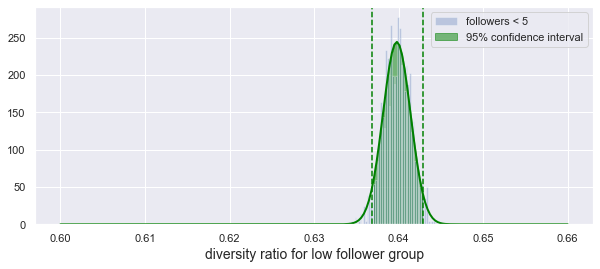

In [327]:
#x = np.linspace(.635, .645, num=200)
x = np.linspace(.60, .66, num=200)


fig, ax = plt.subplots(figsize=(10,4))
ax.hist(less_mean_list, bins=50, density=True, alpha=0.3, label='followers < 5')
ax.plot(x, less_norm_dist.pdf(x), linewidth=2, color='green')
ax.axvline(less_left, color='green', linestyle='dashed')
ax.axvline(less_right, color='green', linestyle='dashed')
ax.fill_between(x, less_norm_dist.pdf(x), where=((less_left <= x) * (less_right >= x)), color='green', alpha = 0.5, label='95% confidence interval')
ax.set_xlabel('diversity ratio for low follower group', fontsize=14)
plt.legend()
#fig.savefig('low_follower_bootstrap.png', dpi=300)
fig.savefig('low_follower_bootstrap3.png', bbox_inches="tight", dpi=300)
plt.show()

In [170]:
greater_sample_strap_list = np.array(bootstrap(greater_equal.diversity_ratio, 1000))

greater_mean_list = greater_sample_strap_list.mean(axis=1) 

In [172]:
greater_mean_list.mean()


0.6317214829002161

In [224]:
greater_bootstrap_mean = greater_mean_list.mean()
greater_bootstrap_std = greater_mean_list.std()
greater_norm_dist = stats.norm(greater_bootstrap_mean, greater_bootstrap_std)
greater_bootstrap_mean, greater_bootstrap_std

(0.6317214829002161, 0.008784889224777624)

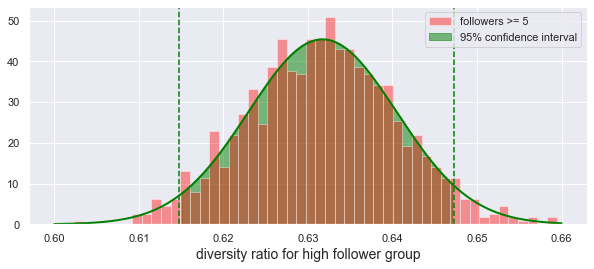

In [328]:
greater_x = np.linspace(.60, .66, num=200)


fig, ax = plt.subplots(figsize=(10,4))
ax.hist(greater_mean_list, bins=50, density=True, color='red', alpha=0.4, label='followers >= 5')
ax.plot(greater_x, greater_norm_dist.pdf(greater_x), linewidth=2, color='green')
ax.axvline(greater_left, color='green', linestyle='dashed')
ax.axvline(greater_right, color='green', linestyle='dashed')
ax.fill_between(greater_x, greater_norm_dist.pdf(greater_x), where=((greater_left <= greater_x) * (greater_right >= greater_x)), color='green', alpha = 0.5, label='95% confidence interval')
ax.set_xlabel('diversity ratio for high follower group', fontsize=14)
plt.legend()
fig.savefig('high_follower_bootstrap3.png', bbox_inches='tight', dpi=300)
plt.show()

In [243]:
# running t test to confirm that we can reject the null hypothesis
stats.ttest_ind(less_than.diversity_ratio, greater_equal.diversity_ratio)
#run on the original sample sets (t test already takes into account uncertainty, don't need to bootstrap)

Ttest_indResult(statistic=0.9027733181213803, pvalue=0.366657088331551)

In [263]:
stats.ttest_ind(greater_equal.diversity_ratio, less_than.diversity_ratio)

Ttest_indResult(statistic=-0.9027733181213803, pvalue=0.366657088331551)

In [245]:
#p-value more than 0.05, FAIL to reject the null hypothesis
#37% of the time, the average diversity_ratio of the greater_ 
#           follower set will fall within the range of less_than follower set

In [330]:
#running a Z-test as well due to large sample size. P-values should be nearly identical: 
ws.ztest(greater_equal.diversity_ratio, less_than.diversity_ratio)

(-0.9027733181213803, 0.3666462148453977)

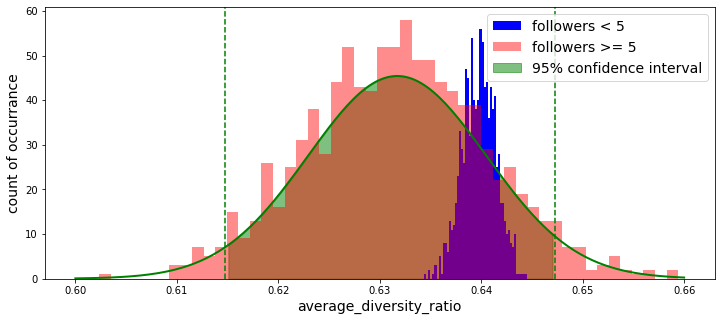

In [261]:
#trying to lay the two graphs over top one another: 
fig, ax = plt.subplots(figsize=(12,5))
ax.hist(less_mean_list, bins=50, color="blue", label="followers < 5")
ax.hist(greater_mean_list, bins=50, color="red", alpha=0.45, label="followers >= 5")
ax.legend()
ax.set_xlabel('average_diversity_ratio', fontsize=14)
ax.set_ylabel('count of occurrance', fontsize=14)
ax.plot(greater_x, greater_norm_dist.pdf(greater_x), linewidth=2, color='green')
ax.axvline(greater_left, color='green', linestyle='dashed')
ax.axvline(greater_right, color='green', linestyle='dashed')
ax.fill_between(greater_x, greater_norm_dist.pdf(greater_x), where=((greater_left <= greater_x) * (greater_right >= greater_x)), color='green', alpha = 0.5, label='95% confidence interval')
plt.legend(fontsize=14)
fig.savefig('hypothesis_test.png', dpi=300)
plt.show()

In [ ]:
# #next steps 
# - adjust bootstrapping to try and bring sample sizes in line with one another??
# - repeating this test with one or more different factors?
#     - collaborative and diversity_ratio
#     - num_tracks and follower count?

# look at using bayes to make a beta distribution